In [3]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [4]:
mnist = tf.keras.datasets.mnist

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 5s 0us/step


In [6]:
len(X_train)

60000

In [7]:
len(X_test)

10000

In [11]:
X_train[0].shape
# Denotes 28 X 28 image

(28, 28)

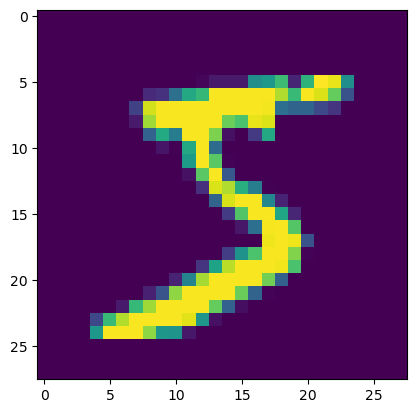

In [12]:
plt.imshow(X_train[0])

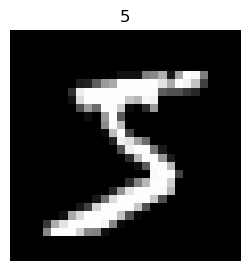

In [13]:
plt.figure(figsize=(3, 3))
plt.imshow(X_train[0], cmap="gray")
plt.title(y_train[0])
plt.axis(False);

In [15]:
X_train.shape

(60000, 28, 28)

### In CNN we need the input to be in shape (height, weight, color_channels)

In [16]:
X_train = X_train.reshape(X_train.shape + (1,))
X_test = X_test.reshape(X_test.shape + (1, ))

In [20]:
X_train  = tf.keras.utils.normalize(X_train, axis = 1)
X_test  = tf.keras.utils.normalize(X_test, axis = 1)

In [21]:
from tensorflow.keras import layers

## TinyVGG architecture,

In [22]:
model = tf.keras.Sequential([
    layers.Conv2D(filters = 10,
                    kernel_size = 3,
                    activation = 'relu',
                    input_shape = (28, 28, 1)),
    layers.Conv2D(10, 3, activation = 'relu'),
    layers.MaxPool2D(),
    layers.Conv2D(10,  3, activation="relu"),
    layers.Conv2D(10,  3, activation="relu"),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(10, activation="softmax")
])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 10)        100       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 10)        910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 10)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 10)        910       
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 10)          910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 10)          0         
 g2D)                                                   

In [27]:
model.compile(loss="sparse_categorical_crossentropy", 
            optimizer=tf.keras.optimizers.Adam(),
            metrics=["accuracy"])

In [28]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 51s 24ms/step - loss: 0.3091 - accuracy: 0.9037
Epoch 2/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1095 - accuracy: 0.9663
Epoch 3/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0798 - accuracy: 0.9755
Epoch 4/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0655 - accuracy: 0.9799
Epoch 5/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0551 - accuracy: 0.9832
Epoch 6/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0495 - accuracy: 0.9840
Epoch 7/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0443 - accuracy: 0.9862
Epoch 8/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0407 - accuracy: 0.9871
Epoch 9/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0377 - accuracy: 0.9879
Epoch 10/10
1875/1875 [==============================] - 43s 23m

In [32]:
loss, accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0440 - accuracy: 0.9856


In [34]:
print(f"Loss is {loss}")
print(f"Accuracy is {accuracy}")

Loss is 0.04401923716068268
Accuracy is 0.9855999946594238


In [40]:
model.save("digit-recognizer.h5")

D:\Anaconda\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [41]:
model = tf.keras.models.load_model('digit-recognizer.h5')

1/1 [==============================] - 0s 38ms/step
This digit is 5


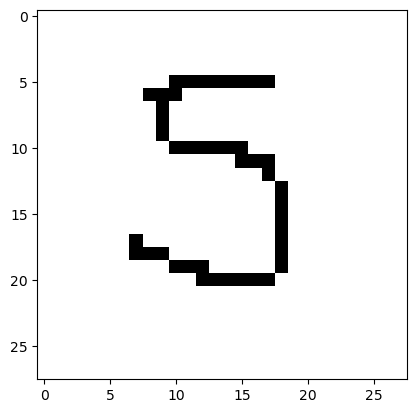

1/1 [==============================] - 0s 41ms/step
This digit is 8


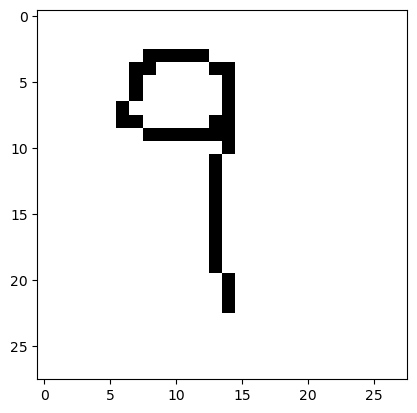

1/1 [==============================] - 0s 44ms/step
This digit is 3


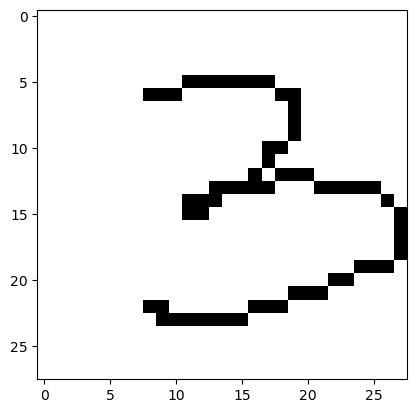

1/1 [==============================] - 0s 46ms/step
This digit is 4


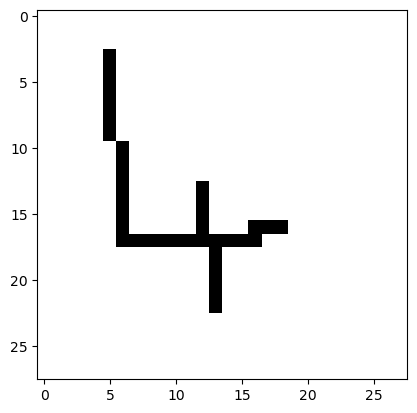

1/1 [==============================] - 0s 44ms/step
This digit is 1


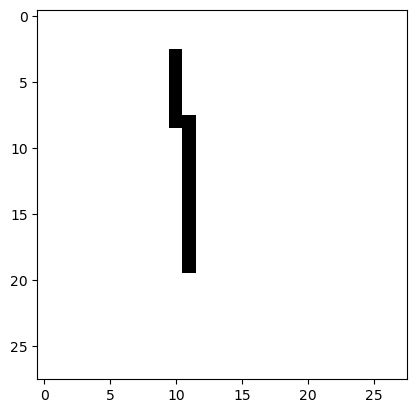

1/1 [==============================] - 0s 45ms/step
This digit is 9


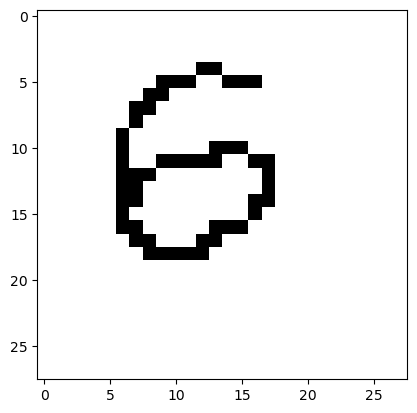

1/1 [==============================] - 0s 43ms/step
This digit is 9


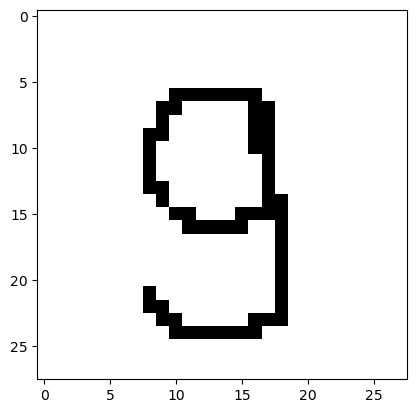

In [51]:
image_number = 1
while os.path.isfile(f"digits/digit{image_number}.png"):
    try:
        img = cv2.imread(f"digits/digit{image_number}.png")[:, :, 0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print(f"This digit is {np.argmax(prediction)}")
        plt.imshow(img[0], cmap = plt.cm.binary)
        plt.show()
    except:
        print("Error")
    finally:
        image_number += 1
